In [1]:
# Dependencies and Setup
#%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
cityride_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
cityride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_df = cityride_data[cityride_data["type"]=='Urban']
suburban_df = cityride_data[cityride_data["type"]=='Suburban']
rural_df = cityride_data[cityride_data["type"]=='Rural']
#suburban_df.head()
#urban_df.head()
#rural_df.head()

In [3]:
# Build the scatter plots for each city types
urban_fare = urban_df.groupby(['city'])['fare'].mean()
urban_rides = urban_df.groupby(['city'])['ride_id'].count()
urban_drivers = urban_df.groupby(['city'])['driver_count'].mean()
#print(urban_fare)

suburban_fare = suburban_df.groupby(['city'])['fare'].mean()
suburban_rides = suburban_df.groupby(['city'])['ride_id'].count()
suburban_drivers = suburban_df.groupby(['city'])['driver_count'].mean()
#print(suburban_rides)

rural_fare = rural_df.groupby(['city'])['fare'].mean()
rural_rides = rural_df.groupby(['city'])['ride_id'].count()
rural_drivers = rural_df.groupby(['city'])['driver_count'].mean()
#print(urban_drivers)

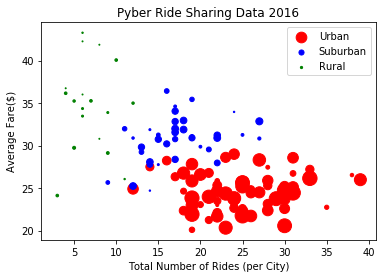

In [9]:
# Incorporate the other graph properties
Urban = plt.scatter(urban_rides, urban_fare, s=urban_drivers*3,c="red", label="Urban")
Suburban = plt.scatter(suburban_rides, suburban_fare, s=suburban_drivers*2,c="blue", label="Suburban")
Rural = plt.scatter(rural_rides, rural_fare, s=rural_drivers*1,c="green", label="Rural")
#plt.show()

# Create a legend
plt.legend(handles=[Urban,Suburban,Rural], loc="best")

# Create X and Y Labels
plt.title("Pyber Ride Sharing Data 2016")
#gender_chart.set_xlabel("Gender")
#gender_chart.set_ylabel("Number of Trips Taken")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (per City)")

# Incorporate a text label regarding circle size
#plt.label("note about circle size")

# Save Figure
plt.savefig("../Images/Bubble_Plot_Ride_Sharing_by_City_Type.png")

# Show plot
plt.show()


## Total Fares by City Type

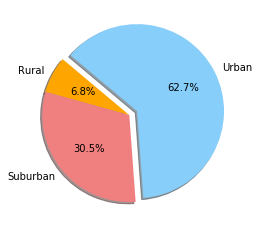

In [5]:
# Calculate Type Percents
total_fare = cityride_data['fare'].sum()
percent_fare = cityride_data.groupby(['type'])['fare'].sum()/total_fare*100
#print(total_fare)
#print(percent_fare)

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(percent_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Fares_by_City_Type.png")

# Show plot
plt.show()


## Total Rides by City Type

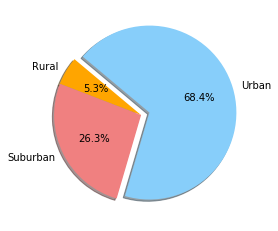

In [6]:
# Calculate Ride Percents
total_ride = cityride_data['ride_id'].count()
percent_ride = cityride_data.groupby(['type'])['ride_id'].count()/total_fare*100
#print(total_ride)
#print(percent_ride)

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(percent_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Riders_by_City_Type.png")

# Show plot
plt.show()


## Total Drivers by City Type

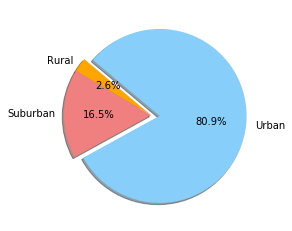

In [7]:
# Calculate Driver Percents
total_urban_driver = urban_drivers.sum()
total_suburban_driver = suburban_drivers.sum()
total_rural_driver = rural_drivers.sum()
#print(total_urban_driver)
#print(total_suburban_driver)
#print(total_rural_driver)

total_drivers = total_urban_driver + total_suburban_driver + total_rural_driver
#print(total_drivers)

percent_urban = total_urban_driver/total_drivers*100
percent_suburban = total_suburban_driver/total_drivers*100
percent_rural = total_rural_driver/total_drivers*100
#print(percent_urban)
#print(percent_suburban)
#print(percent_rural)


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = percent_rural, percent_suburban, percent_urban

# The colors of each section of the pie chart
colors = ["orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/Total_Drivers_by_City_Type.png")

# Show plot
plt.show()
